In [58]:
import tweepy           # T
import pandas as pd     
import numpy as np      

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import translator
import json
import googletrans

import re

from googletrans import Translator
Translator = Translator()

In [59]:
ACCESS_TOKEN = "1151666277036859392-SWXz8IOVZ9ijCb3TVodakiO7xx5Xho"
ACCESS_TOKEN_SECRET = "8nJrshCFrGcwHCATBKuqciCPHcPbgR9UYs0gsaUfLH79h"
CONSUMER_KEY = "GrUzSnJ90yxhHqgRqTKdQH7J4"
CONSUMER_SECRET = "ZczgmhYz4iHV8W35MC1nf2LNboEUB8fr7xCps3L6dAd9spPdxc"

In [60]:
def twitter_setup():
   
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

   
    api = tweepy.API(auth)
    return api

In [61]:
query=["FadliZon"] # Enter user or query

In [63]:
def twitter_setup():
   
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

   
    api = tweepy.API(auth)
    return api
extractor = twitter_setup()
counter = 0

for query_each in query:    
    

    public_tweets = extractor.search(q=query_each, count=100, geocode="-6.2293867,106.6894293,100km",parser=tweepy.parsers.JSONParser())
    
    if counter<1:
        tweets = public_tweets['statuses']
        counter = counter+1
    else:
        tweets.extend(public_tweets['statuses'])

         
    print(''+query_each)
    print('Number of tweets extracted: {}.\n'.format(len(public_tweets['statuses'])))

    print("5 recent tweets:\n")
    for tweet in public_tweets['statuses'][:5]:
        print(tweet['text'])
        print()
        
with open('fa.json', 'w') as json_file:
    json.dump(tweets, json_file)

FadliZon
Number of tweets extracted: 100.

5 recent tweets:

RT @Barna_byo: @mpok__minah @heniunique @fadlizon 🤣🤣🤣 https://t.co/Y5nc4Lc3Cq

RT @Barna_byo: @mpok__minah @heniunique @fadlizon Naaah Keliatan dah...🤣🤣 https://t.co/c25lF7ZzHl

@mpok__minah @heniunique @fadlizon Naaah Keliatan dah...🤣🤣 https://t.co/c25lF7ZzHl

@mpok__minah @heniunique @fadlizon 🤣🤣🤣 https://t.co/Y5nc4Lc3Cq

RT @453prh: @AwalSantjuba @zawiyarraudhah @ZUL_Hasan @sn_setyanovanto @Fahrihamzah @fadlizon @mohmahfudmd @Arisnh99 @gumilanghidayat @Binta…



In [65]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet['text'] for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,RT @Barna_byo: @mpok__minah @heniunique @fadli...
1,RT @Barna_byo: @mpok__minah @heniunique @fadli...
2,@mpok__minah @heniunique @fadlizon Naaah Kelia...
3,@mpok__minah @heniunique @fadlizon 🤣🤣🤣 https:/...
4,RT @453prh: @AwalSantjuba @zawiyarraudhah @ZUL...
5,"RT @FirzaHusain: Perlu dicatat ya, yang dipind..."
6,RT @Barna_byo: @mpok__minah @heniunique @fadli...
7,@susipudjiastuti @SBYudhoyono @hotmanParis @Ra...
8,@fadlizon Sedang dilakukan pake Smartphone......
9,@mpok__minah @heniunique @fadlizon Mpok pakai ...


In [66]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [67]:
data['len']  = np.array([len(tweet['text']) for tweet in tweets])
data['ID']   = np.array([tweet['id'] for tweet in tweets])
data['Date'] = np.array([tweet['created_at'] for tweet in tweets])
data['Source'] = np.array([tweet['source'] for tweet in tweets])
data['Likes']  = np.array([tweet['favorite_count'] for tweet in tweets])
data['RTs']    = np.array([tweet['retweet_count'] for tweet in tweets])
data['Language'] = np.array([tweet['lang'] for tweet in tweets])

counter_source = 0;
for source in data['Source']:

    clean = re.compile('<.*?>')   
    data['Source'][counter_source] = re.sub(clean, '', source)
    counter_source = counter_source+1

C:\Users\WIN 8.1\New folder\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [68]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,Language
0,RT @Barna_byo: @mpok__minah @heniunique @fadli...,77,1163400540660781056,Mon Aug 19 10:41:18 +0000 2019,Twitter for Android,0,1,und
1,RT @Barna_byo: @mpok__minah @heniunique @fadli...,97,1163400440643346432,Mon Aug 19 10:40:54 +0000 2019,Twitter for Android,0,1,in
2,@mpok__minah @heniunique @fadlizon Naaah Kelia...,82,1163399841877123072,Mon Aug 19 10:38:31 +0000 2019,Twitter Web App,0,1,in
3,@mpok__minah @heniunique @fadlizon 🤣🤣🤣 https:/...,62,1163399586070720512,Mon Aug 19 10:37:30 +0000 2019,Twitter Web App,0,1,und
4,RT @453prh: @AwalSantjuba @zawiyarraudhah @ZUL...,140,1163399283078356992,Mon Aug 19 10:36:18 +0000 2019,Twitter for Android,0,6,in
5,"RT @FirzaHusain: Perlu dicatat ya, yang dipind...",140,1163399090731831296,Mon Aug 19 10:35:32 +0000 2019,Twitter Web App,0,29,in
6,RT @Barna_byo: @mpok__minah @heniunique @fadli...,86,1163398660257746944,Mon Aug 19 10:33:50 +0000 2019,Twitter for Android,0,1,in
7,@susipudjiastuti @SBYudhoyono @hotmanParis @Ra...,139,1163398500131803136,Mon Aug 19 10:33:11 +0000 2019,Twitter for Android,0,0,und
8,@fadlizon Sedang dilakukan pake Smartphone......,48,1163398371391897602,Mon Aug 19 10:32:41 +0000 2019,Twitter for Android,0,0,in
9,@mpok__minah @heniunique @fadlizon Mpok pakai ...,71,1163398229154623488,Mon Aug 19 10:32:07 +0000 2019,Twitter Web App,1,1,in


In [69]:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 91.93


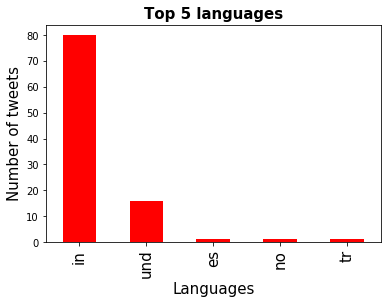

In [37]:
tweets_by_lang = data['Language'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [70]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Anda @fadlizon tidak ada disitu dulu... Ada ya?😂

Video lama tapi menghibur krn kocak😂 sekaligus memberi banyak pel… https://t.co/Y5Tq5bw3A4
Number of likes: 23
140 characters.

The tweet with more retweets is: 
RT @Imad_kun: @streetwarrior87 @jokowi @Fahrihamzah @fadlizon Keji nya....!!!

OPM, Wujud Nyata Radikalisme dan Terorisme
https://t.co/bJfg…
Number of retweets: 45
140 characters.



In [71]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

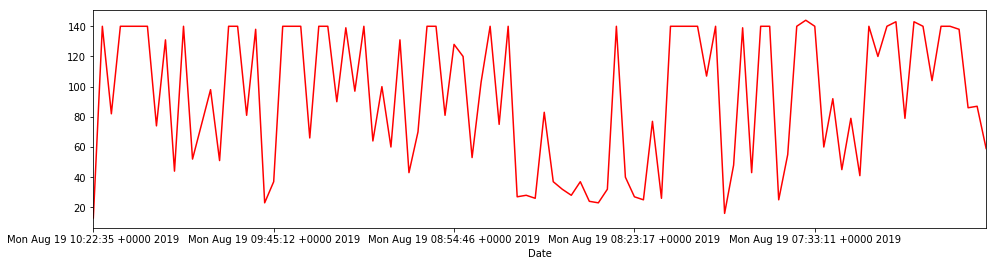

In [40]:
tlen.plot(figsize=(16,4), color='r');

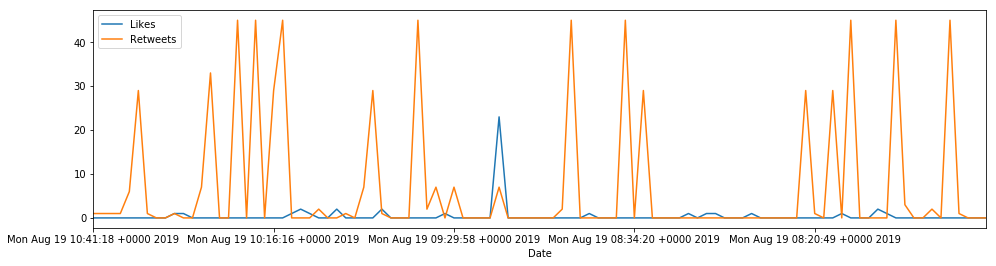

In [72]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [73]:
sources = []
for source in data['Source']:
    
    if source not in sources:        
        sources.append(source)


print("Creation of content sources:")
for source in sources:    
    print(source)

Creation of content sources:
Twitter for Android
Twitter Web App
Twitter for iPhone


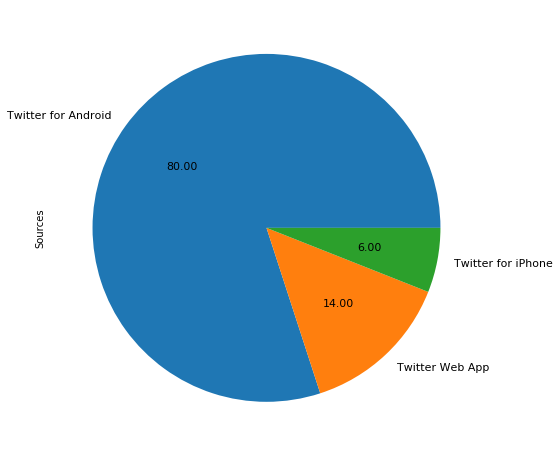

In [74]:
percent = np.zeros(len(sources))

for source in data['Source']:
    
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 10


pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(10,8));

In [75]:
from textblob import TextBlob
import re
# Import google translate
from googletrans import Translator
translator = Translator()

def clean_tweet(tweet):
       
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

#translate tweet 
def translate_bahasa(tweet):
    tweet = translator.translate(tweet.encode('utf-8').decode('ascii',errors='ignore'), src='id', dest='en') 
    tweet = tweet.text
    return tweet

def analize_sentiment(tweet):
    
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [45]:
!pip install textblob

In [76]:
data['Translate'] = np.array([translate_bahasa(tweet) for tweet in data['Tweets']])


data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Translate'] ])
data['SAID'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,Language,Translate,SA,SAID
0,RT @Barna_byo: @mpok__minah @heniunique @fadli...,77,1163400540660781056,Mon Aug 19 10:41:18 +0000 2019,Twitter for Android,0,1,und,RT @Barna_byo: @mpok__minah @heniunique @fadli...,0,0
1,RT @Barna_byo: @mpok__minah @heniunique @fadli...,97,1163400440643346432,Mon Aug 19 10:40:54 +0000 2019,Twitter for Android,0,1,in,RT @Barna_byo: @mpok__minah @heniunique @fadli...,0,0
2,@mpok__minah @heniunique @fadlizon Naaah Kelia...,82,1163399841877123072,Mon Aug 19 10:38:31 +0000 2019,Twitter Web App,0,1,in,@mpok__minah @heniunique @fadlizon Naaah Kelia...,0,0
3,@mpok__minah @heniunique @fadlizon 🤣🤣🤣 https:/...,62,1163399586070720512,Mon Aug 19 10:37:30 +0000 2019,Twitter Web App,0,1,und,@mpok__minah @heniunique @fadlizon https://t.c...,0,0
4,RT @453prh: @AwalSantjuba @zawiyarraudhah @ZUL...,140,1163399283078356992,Mon Aug 19 10:36:18 +0000 2019,Twitter for Android,0,6,in,RT @ 453prh: @AwalSantjuba @zawiyarraudhah @ZU...,0,0
5,"RT @FirzaHusain: Perlu dicatat ya, yang dipind...",140,1163399090731831296,Mon Aug 19 10:35:32 +0000 2019,Twitter Web App,0,29,in,"RT @FirzaHusain: It should be noted yes, the o...",0,0
6,RT @Barna_byo: @mpok__minah @heniunique @fadli...,86,1163398660257746944,Mon Aug 19 10:33:50 +0000 2019,Twitter for Android,0,1,in,RT @Barna_byo: @mpok__minah @heniunique @fadli...,0,0
7,@susipudjiastuti @SBYudhoyono @hotmanParis @Ra...,139,1163398500131803136,Mon Aug 19 10:33:11 +0000 2019,Twitter for Android,0,0,und,@susipudjiastuti @SBYudhoyono @hotmanParis @Ra...,0,0
8,@fadlizon Sedang dilakukan pake Smartphone......,48,1163398371391897602,Mon Aug 19 10:32:41 +0000 2019,Twitter for Android,0,0,in,@fadlizon On smartphone,0,0
9,@mpok__minah @heniunique @fadlizon Mpok pakai ...,71,1163398229154623488,Mon Aug 19 10:32:07 +0000 2019,Twitter Web App,1,1,in,@mpok__minah @heniunique @fadlizon Mpok using ...,0,0


In [77]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

pos_tweets_id = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SAID'][index] > 0]
neu_tweets_id = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SAID'][index] == 0]
neg_tweets_id = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SAID'][index] < 0]

In [78]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 24.0%
Percentage of neutral tweets: 64.0%
Percentage of negative tweets: 12.0%


Sentimen Analisis Sesudah diTranslate ke bahasa inggris


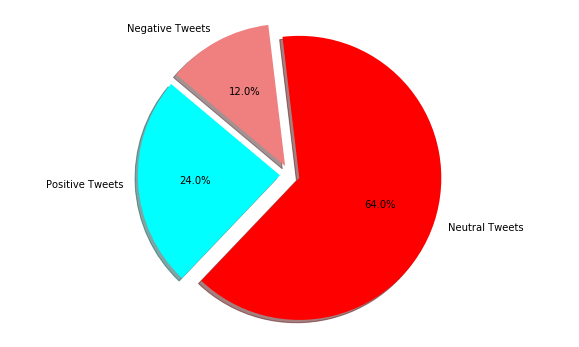

Sentimen Analisis Sebelum diTranslate


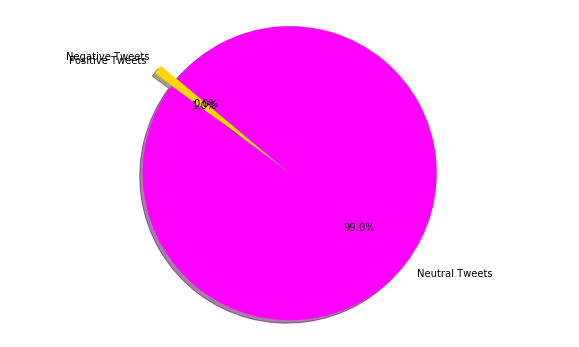

In [79]:
print('Sentimen Analisis Sesudah diTranslate ke bahasa inggris')
# Data 
labels = 'Positive Tweets', 'Neutral Tweets','Negative Tweets'
sizes = [len(pos_tweets)*100/len(data['Tweets']), len(neu_tweets)*100/len(data['Tweets']), len(neg_tweets)*100/len(data['Tweets'])]
colors = ['cyan', 'red', 'lightcoral']
explode = (0.07, 0.07, 0.07)  # explode 1st slice
 
# Plot
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

#BAHASA INDO
print('Sentimen Analisis Sebelum diTranslate')
# Data to plot
labels = 'Positive Tweets', 'Neutral Tweets','Negative Tweets'
sizes = [len(pos_tweets_id)*100/len(data['Tweets']), len(neu_tweets_id)*100/len(data['Tweets']), len(neg_tweets_id)*100/len(data['Tweets'])]
colors = ['gold', 'magenta', 'lightcoral']
explode = (0.07, 0.07, 0.07)  # explode 1st slice
 
# Plot
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [80]:
print('Sentimen Analisis Sebelum diTranslate')
# Data to plot
labels = 'Positive Tweets', 'Neutral Tweets','Negative Tweets'
sizes = [len(pos_tweets_id)*100/len(data['Tweets']), len(neu_tweets_id)*100/len(data['Tweets']), len(neg_tweets_id)*100/len(data['Tweets'])]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.07, 0.07, 0.07)  # explode 1st slice

Sentimen Analisis Sebelum diTranslate
